In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
import pandas as pd

# Load cleaned dataset
CLEANED_FILE = r"C:\Users\SAHARA\OneDrive\Desktop\uni\gemma\cleaning\cleaned_ems_outputf.csv"
df = pd.read_csv(CLEANED_FILE)

# Strip column whitespace
df.columns = df.columns.str.strip()

# Inspect first few rows and columns
df.head()


,Incident_Number,Time_Call_Was_Received,Time_Vehicle_was_Dispatched,Time_Vehicle_was_en_Route_to_Scene,Time_Arrived_on_Scene,Time_Arrived_at_Patient,Time_Departed_from_the_Scene,"Time_Arrived_to_Next_Destination_(i.e.,_Hospital)",Year_Call_Received,Month_Call_Received,...,Protocol_Used_by_EMS_Personnel,Patient_Age,Patient_Residence/Assist. Living_County,Patient_Gender,Disposition,Where_Patient_was_Transported,Incident_Geocode_Location,Incident_Latitude,Incident_Longitude,Unique_ID
0,F21000130,02-01-2021 17:11,02-01-2021 17:11,02-01-2021 17:12,02-01-2021 17:22,02-01-2021 17:23,02-01-2021 17:32,02-01-2021 17:44,2021,Jan,...,BLS Routine Medical Care,66,Marin,Male,Transported by this EMS Unit,Novato Community Hospital,"(38.105741, -122.595229)",38.105741,-122.595229,F21000130-1
1,F21000455,06-01-2021 11:17,06-01-2021 11:17,06-01-2021 11:18,06-01-2021 11:25,06-01-2021 11:26,06-01-2021 11:32,06-01-2021 11:36,2021,Jan,...,Medical-CVA (Stroke),89,Unknown,Female,Transported by this EMS Unit,"Kaiser Permanente, San Rafael","(38.01316, -122.555319)",38.013160,-122.555319,F21000455-1
2,F20034654,25-12-2020 20:53,25-12-2020 20:53,25-12-2020 20:55,25-12-2020 21:04,25-12-2020 21:06,25-12-2020 21:15,25-12-2020 21:34,2020,Dec,...,Medical-Syncope,83,Marin,Female,Transported by this EMS Unit,"Kaiser Permanente, San Rafael","(38.097482, -122.60143)",38.097482,-122.601430,F20034654-3
3,F20034793,27-12-2020 09:56,27-12-2020 09:56,27-12-2020 09:58,27-12-2020 10:00,27-12-2020 10:06,27-12-2020 10:23,27-12-2020 10:34,2020,Dec,...,"General-Routine Medical Care, ALS",90,Marin,Female,Transported by this EMS Unit,Marin General Hospital,"(37.972209, -122.515582)",37.972209,-122.515582,F20034793-1
4,F20034898,28-12-2020 14:42,28-12-2020 14:42,28-12-2020 14:43,28-12-2020 14:45,28-12-2020 14:47,28-12-2020 14:58,28-12-2020 15:40,2020,Dec,...,"General-Routine Medical Care, ALS",76,Unknown,Male,Transported by this EMS Unit,Marin General Hospital,"(38.069121, -122.881737)",38.069121,-122.881737,F20034898-1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110816 entries, 0 to 110815
Data columns (total 29 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Incident_Number                                    110816 non-null  object 
 1   Time_Call_Was_Received                             110816 non-null  object 
 2   Time_Vehicle_was_Dispatched                        110816 non-null  object 
 3   Time_Vehicle_was_en_Route_to_Scene                 110816 non-null  object 
 4   Time_Arrived_on_Scene                              110816 non-null  object 
 5   Time_Arrived_at_Patient                            110816 non-null  object 
 6   Time_Departed_from_the_Scene                       110816 non-null  object 
 7   Time_Arrived_to_Next_Destination_(i.e.,_Hospital)  110816 non-null  object 
 8   Year_Call_Received                                 110816 non-null  int64 

In [ ]:
df.columns

Index(['Incident_Number', 'Time_Call_Was_Received',
       'Time_Vehicle_was_Dispatched', 'Time_Vehicle_was_en_Route_to_Scene',
       'Time_Arrived_on_Scene', 'Time_Arrived_at_Patient',
       'Time_Departed_from_the_Scene',
       'Time_Arrived_to_Next_Destination_(i.e.,_Hospital)',
       'Year_Call_Received', 'Month_Call_Received', 'Incident_Address',
       'Incident_City', 'Incident_ZIP_Postal', 'Incident_County',
       'Primary_Impression', 'Primary_Injury', 'Injury_Detail', 'Injury_Place',
       'Injury_Date', 'Protocol_Used_by_EMS_Personnel', 'Patient_Age',
       'Patient_Home_County', 'Patient_Gender', 'Disposition',
       'Where_Patient_was_Transported', 'Incident_Geocode_Location',
       'Incident_Latitude', 'Incident_Longitude', 'Unique_ID'],
      dtype='object')

In [18]:
# Ensure date columns are parsed correctly from DD-MM-YYYY HH:MM
date_cols = [
    'Time_Call_Was_Received',
    'Time_Vehicle_was_Dispatched',
    'Time_Arrived_on_Scene',
    'Time_Arrived_at_Patient'
]

df[date_cols] = df[date_cols].apply(
    lambda col: pd.to_datetime(col, errors="coerce", dayfirst=True)
)

# Create response time features
df['response_time_min'] = (
    df['Time_Arrived_on_Scene'] - df['Time_Vehicle_was_Dispatched']
).dt.total_seconds() / 60

df['turnout_time_min'] = (
    df['Time_Vehicle_was_Dispatched'] - df['Time_Call_Was_Received']
).dt.total_seconds() / 60

df['call_cycle_time_min'] = (
    df['Time_Arrived_on_Scene'] - df['Time_Call_Was_Received']
).dt.total_seconds() / 60
df["on_scene_time_min"] = (
    pd.to_datetime(df["Time_Arrived_at_Patient"]) - 
    pd.to_datetime(df["Time_Arrived_on_Scene"])
).dt.total_seconds() / 60
df[['response_time_min', 'turnout_time_min', 'call_cycle_time_min', 'on_scene_time_min']].head()


,response_time_min,turnout_time_min,call_cycle_time_min,on_scene_time_min
0,11.0,0.0,11.0,1.0
1,8.0,0.0,8.0,1.0
2,11.0,0.0,11.0,2.0
3,4.0,0.0,4.0,6.0
4,3.0,0.0,3.0,2.0


In [19]:
# Columns to validate
time_cols = ['response_time_min', 'turnout_time_min', 'call_cycle_time_min','on_scene_time_min']

# ---------------------------------------------
# 1. Count negative times
# ---------------------------------------------
invalid_negative = df[(df[time_cols] < 0).any(axis=1)]
print(f"Rows with negative times: {invalid_negative.shape[0]}")

# Drop negative rows
df = df[~(df[time_cols] < 0).any(axis=1)].copy()
print(f"Rows after dropping negative times: {df.shape[0]}")

# ---------------------------------------------
# 2. Count extreme (>300 min) values
# ---------------------------------------------
invalid_extreme = df[(df[time_cols] > 300).any(axis=1)]
print(f"Rows with times > 300 minutes: {invalid_extreme.shape[0]}")

# Drop extreme rows
df = df[~(df[time_cols] > 300).any(axis=1)].copy()
print(f"Rows after dropping >300 times: {df.shape[0]}")
import pandas as pd




Rows with negative times: 495
Rows after dropping negative times: 108661
Rows with times > 300 minutes: 122
Rows after dropping >300 times: 108539


In [17]:
date_cols = [
    'Time_Call_Was_Received',
    'Time_Vehicle_was_Dispatched',
    'Time_Arrived_on_Scene',
    'Time_Arrived_at_Patient',
    'Time_Departed_from_the_Scene'
]

df[date_cols] = df[date_cols].apply(pd.to_datetime, dayfirst=True, errors="coerce")


In [20]:
df = df.drop_duplicates(subset="Incident_Number", keep="first")

print(f"Rows after dropping duplicates: {len(df)}")


Rows after dropping duplicates: 108539


In [21]:
OUTPUT_PATH = r"C:\Users\SAHARA\OneDrive\Desktop\uni\gemma\eda\eda.csv"
df.to_csv(OUTPUT_PATH, index=False)

In [76]:
numeric_cols = ['response_time_min', 'turnout_time_min', 'call_cycle_time_min', 'on_scene_time_min', 'Patient_Age']
numeric_summary = df[numeric_cols].describe(percentiles=[0.25,0.5,0.75,0.9])
numeric_summary


,response_time_min,turnout_time_min,call_cycle_time_min,on_scene_time_min,Patient_Age
count,108558.000000,108558.000000,108558.000000,108558.000000,108558.000000
mean,7.285423,0.723668,8.009092,1.919039,62.865583
std,4.473912,1.861725,4.888024,3.538150,23.800438
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,5.000000,1.000000,48.000000
50%,7.000000,0.000000,7.000000,1.000000,67.000000
75%,9.000000,1.000000,10.000000,2.000000,82.000000
90%,12.000000,2.000000,13.000000,3.000000,90.000000
max,213.000000,124.000000,213.000000,260.000000,165.000000


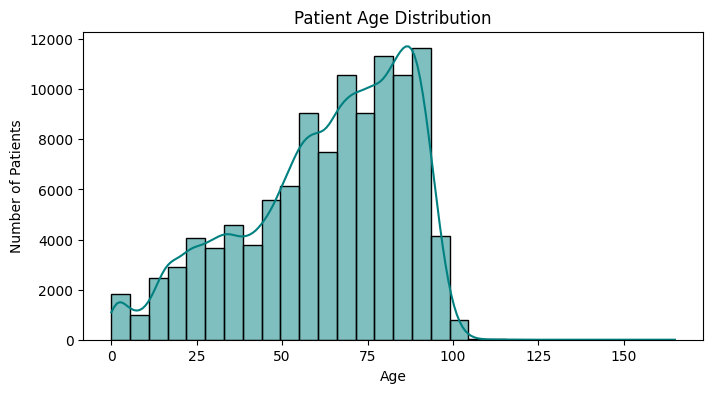

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(df['Patient_Age'].dropna(), bins=30, kde=True, color='teal')
plt.title('Patient Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()


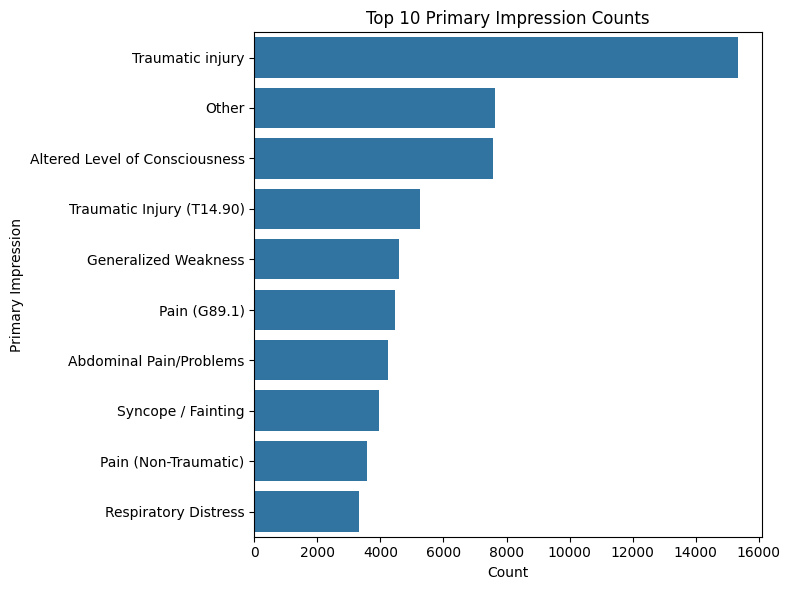

In [9]:
plt.figure(figsize=(8, 6))
top10 = df['Primary_Impression'].value_counts().head(10)

sns.countplot(
    y=df['Primary_Impression'],
    order=top10.index
)

plt.title('Top 10 Primary Impression Counts')
plt.xlabel('Count')
plt.ylabel('Primary Impression')
plt.tight_layout()
plt.show()


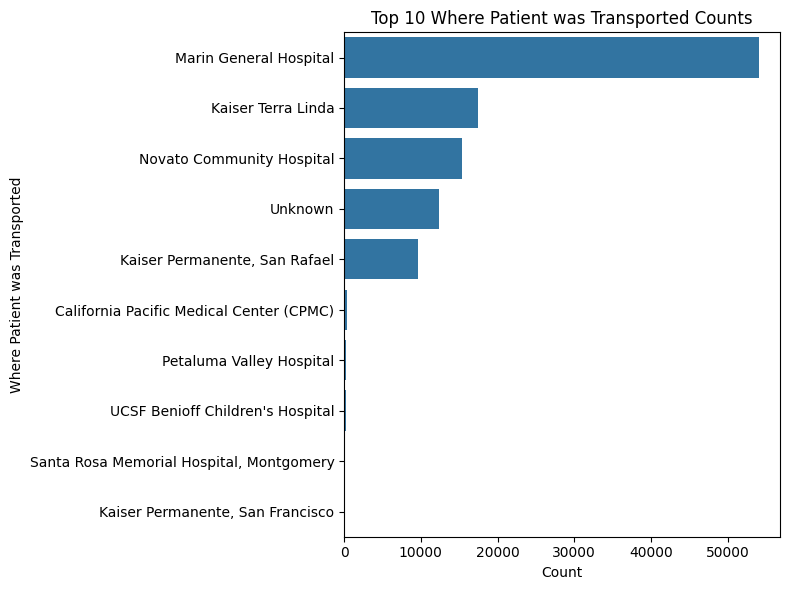

In [24]:
plt.figure(figsize=(8, 6))
top10 = df['Where_Patient_was_Transported'].value_counts().head(10)

sns.countplot(
    y=df['Where_Patient_was_Transported'],
    order=top10.index
)

plt.title('Top 10 Where Patient was Transported Counts')
plt.xlabel('Count')
plt.ylabel('Where Patient was Transported')
plt.tight_layout()
plt.show()


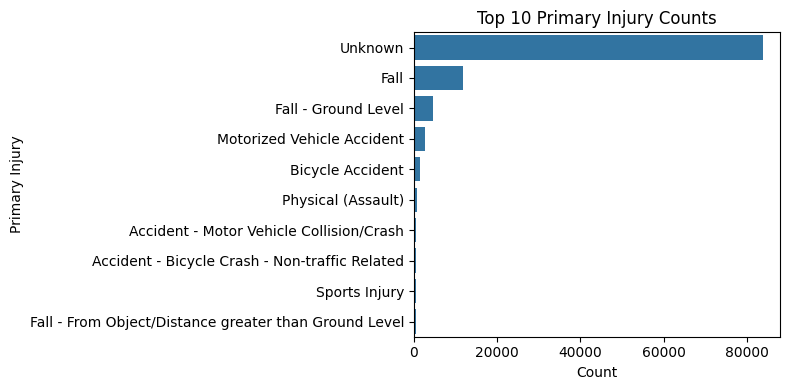

In [10]:
plt.figure(figsize=(8, 4))
top10 = df['Primary_Injury'].value_counts().head(10)

sns.countplot(
    y=df['Primary_Injury'],
    order=top10.index
)

plt.title('Top 10 Primary Injury Counts')
plt.xlabel('Count')
plt.ylabel('Primary Injury')
plt.tight_layout()
plt.show()


In [25]:
hospitals= df['Where_Patient_was_Transported'].nunique()
print(f"Number of unique values in 'Where_Patient_was_Transported': {hospitals}")


Number of unique values in 'Where_Patient_was_Transported': 60


In [11]:
import pandas as pd

categorical_cols = ['Primary_Impression', 'Primary_Injury', 'Patient_Gender', 'Disposition']

# Create a summary table
summary_tables = {}

for col in categorical_cols:
    counts = df[col].value_counts().rename_axis(col).reset_index(name='Count')
    summary_tables[col] = counts

# Display all tables
for col, table in summary_tables.items():
    print(f"--- {col} ---")
    display(table)


--- Primary_Impression ---


,Primary_Impression,Count
0,Traumatic injury,15337
1,Other,7648
2,Altered Level of Consciousness,7583
3,Traumatic Injury (T14.90),5246
4,Generalized Weakness,4589
...,...,...
162,Hyperglycemia (Not Diabetic),2
163,Hazmat Exposure (Z77.9),2
164,Frostbite,1
165,"Inhalation Injury (Toxic Gas,Carbon Monoxide, ...",1


--- Primary_Injury ---


,Primary_Injury,Count
0,Unknown,83745
1,Fall,11835
2,Fall - Ground Level,4596
3,Motorized Vehicle Accident,2745
4,Bicycle Accident,1581
...,...,...
92,"Fall - Ground Level,Accident - Auto-Pedestrian",1
93,"Fall - Ground Level,Assault - Injury from Blun...",1
94,Accident - Bicycle Crash - Non-traffic Related...,1
95,"Accident - Motor Vehicle Collision/Crash,Accid...",1


--- Patient_Gender ---


,Patient_Gender,Count
0,Female,56647
1,Male,53765
2,Not Reported,169
3,Unknown (Unable to Determine),84
4,Unknown,1


--- Disposition ---


,Disposition,Count
0,Transported No Lights/Siren,58315
1,Transported by this EMS Unit,34906
2,"Treatment, No Transport",5644
3,"No treatment, No Transport",5608
4,Transported Lights/Siren,4151
5,"Dead on Scene, No Transport",941
6,Patient Care Transferred,574
7,"Transported No Lights/Siren, Upgraded",300
8,"Transported Lights/Siren, Downgraded",46
9,"Transported to Landing Zone, Care Transferred",43


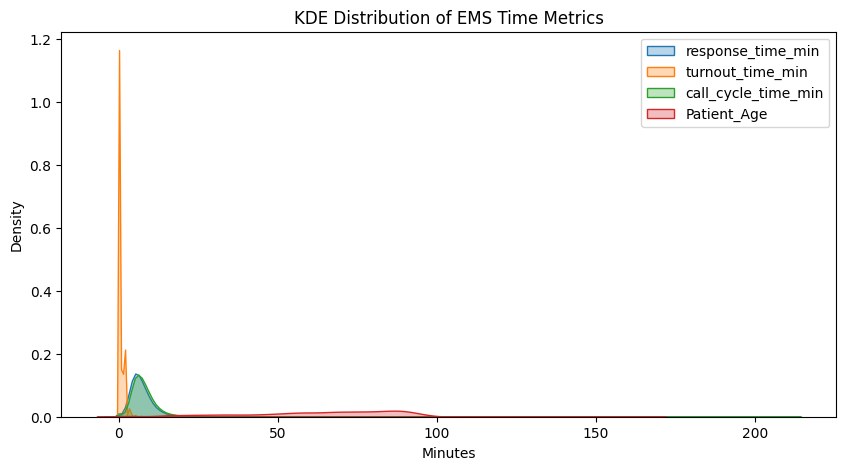

In [12]:
plt.figure(figsize=(10,5))
for col in numeric_cols:
    sns.kdeplot(df[col], label=col, fill=True, alpha=0.3)

plt.title('KDE Distribution of EMS Time Metrics')
plt.xlabel('Minutes')
plt.legend()
plt.show()


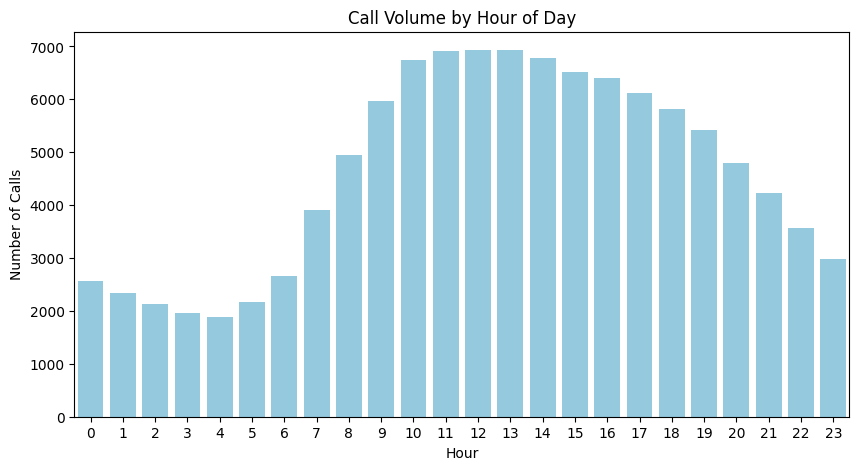

In [13]:
df['hour'] = df['Time_Call_Was_Received'].dt.hour

plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df, color='skyblue')
plt.title("Call Volume by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Calls")
plt.show()


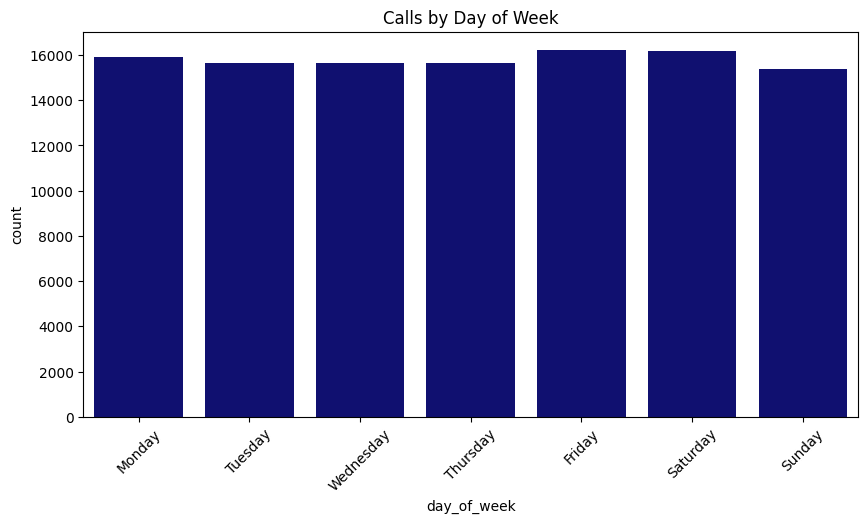

In [14]:
df['day_of_week'] = df['Time_Call_Was_Received'].dt.day_name()

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='day_of_week',
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], color='navy')
plt.xticks(rotation=45)
plt.title("Calls by Day of Week")
plt.show()


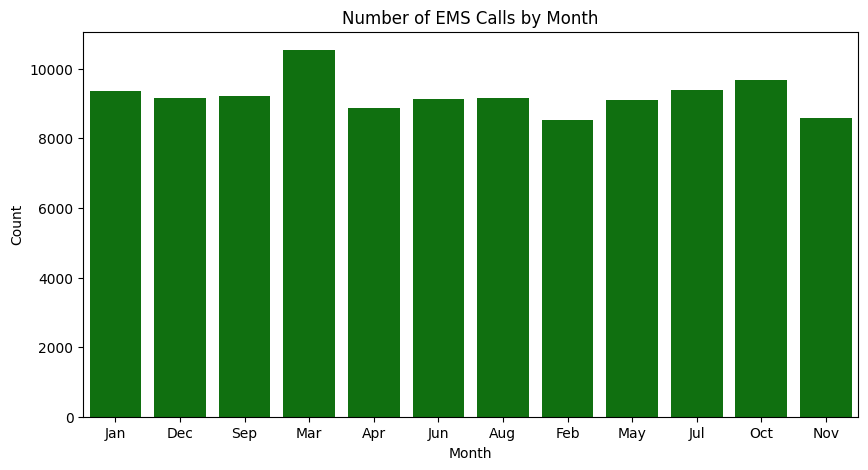

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month_Call_Received', data=df, color='green')
plt.title("Number of EMS Calls by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


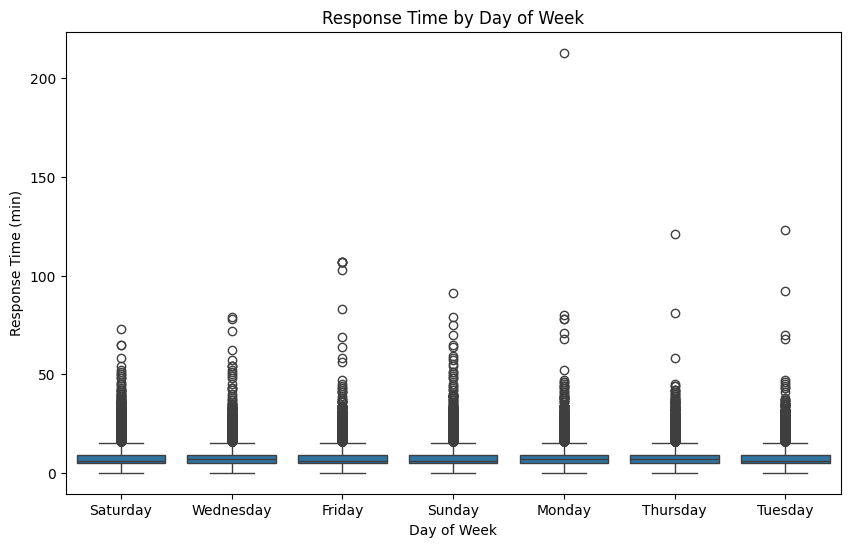

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='day_of_week', y='response_time_min')
plt.title("Response Time by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Response Time (min)")
plt.show()


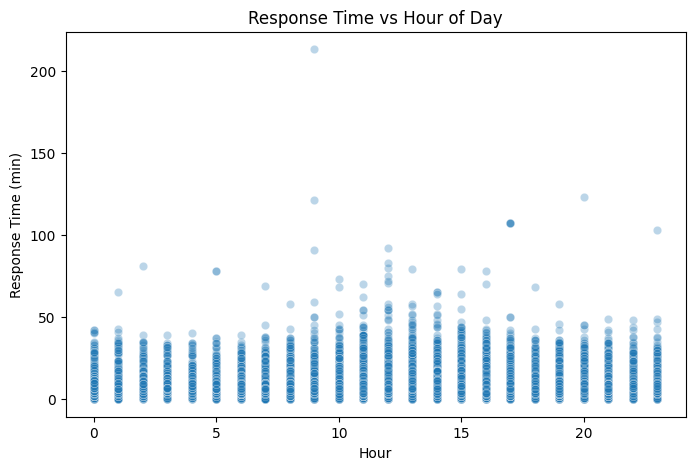

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['hour'], y=df['response_time_min'], alpha=0.3)
plt.title("Response Time vs Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Response Time (min)")
plt.show()


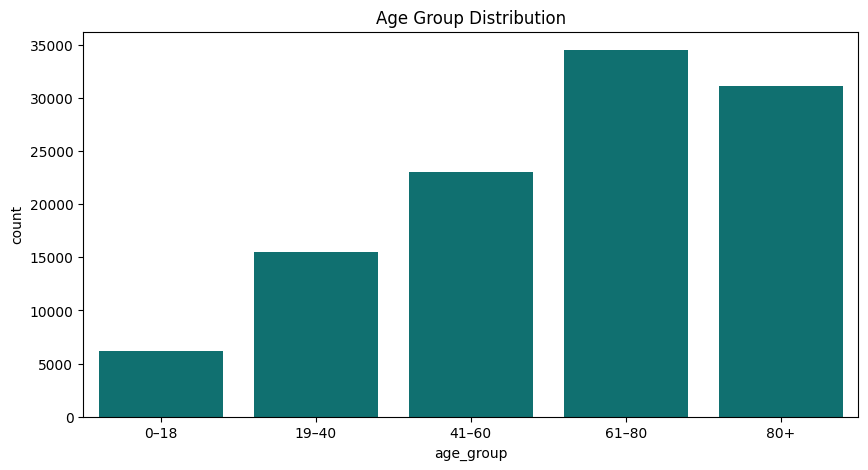

In [18]:
df['age_group'] = pd.cut(df['Patient_Age'],
                         bins=[0,18,40,60,80,120],
                         labels=['0–18','19–40','41–60','61–80','80+'])

plt.figure(figsize=(10,5))
sns.countplot(x='age_group', data=df, color='teal')
plt.title('Age Group Distribution')
plt.show()


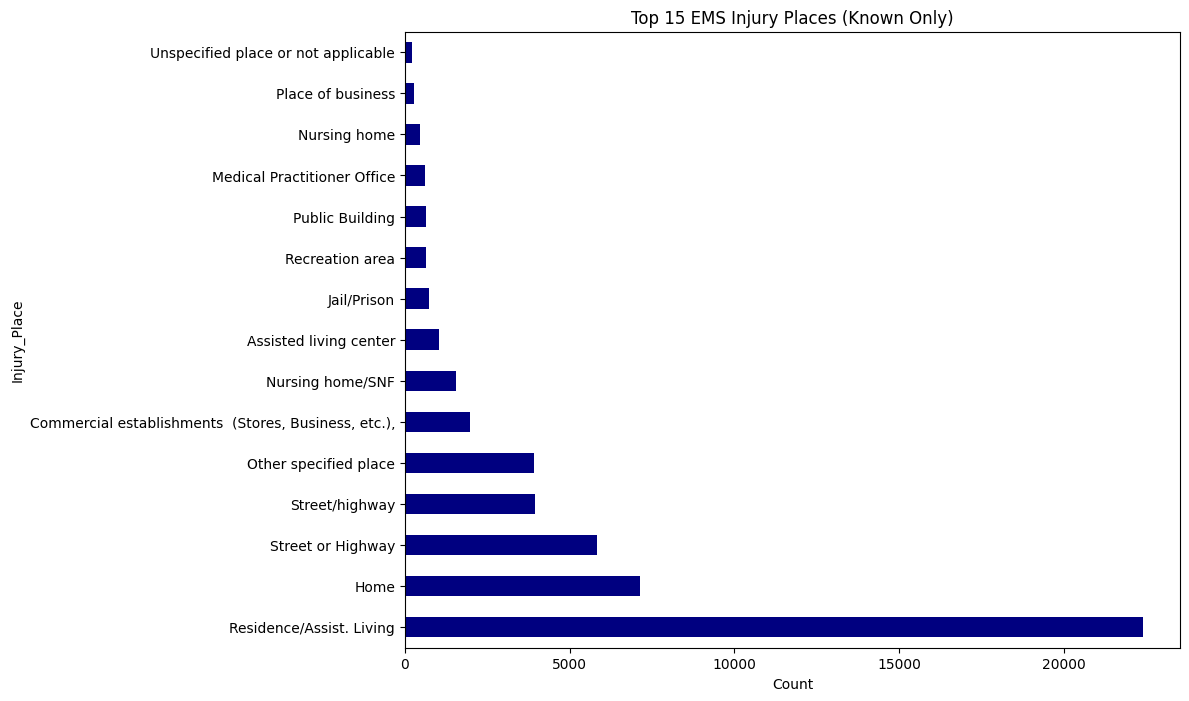

In [19]:
# Filter out unknown / NaN values
df_filtered = df[df['Injury_Place'].notna() & (df['Injury_Place'].str.strip().str.lower() != 'unknown')]

# Plot top 15
df_filtered['Injury_Place'].value_counts().head(15).plot(kind='barh', figsize=(10,8), color='navy')
plt.title("Top 15 EMS Injury Places (Known Only)")
plt.xlabel("Count")
plt.show()


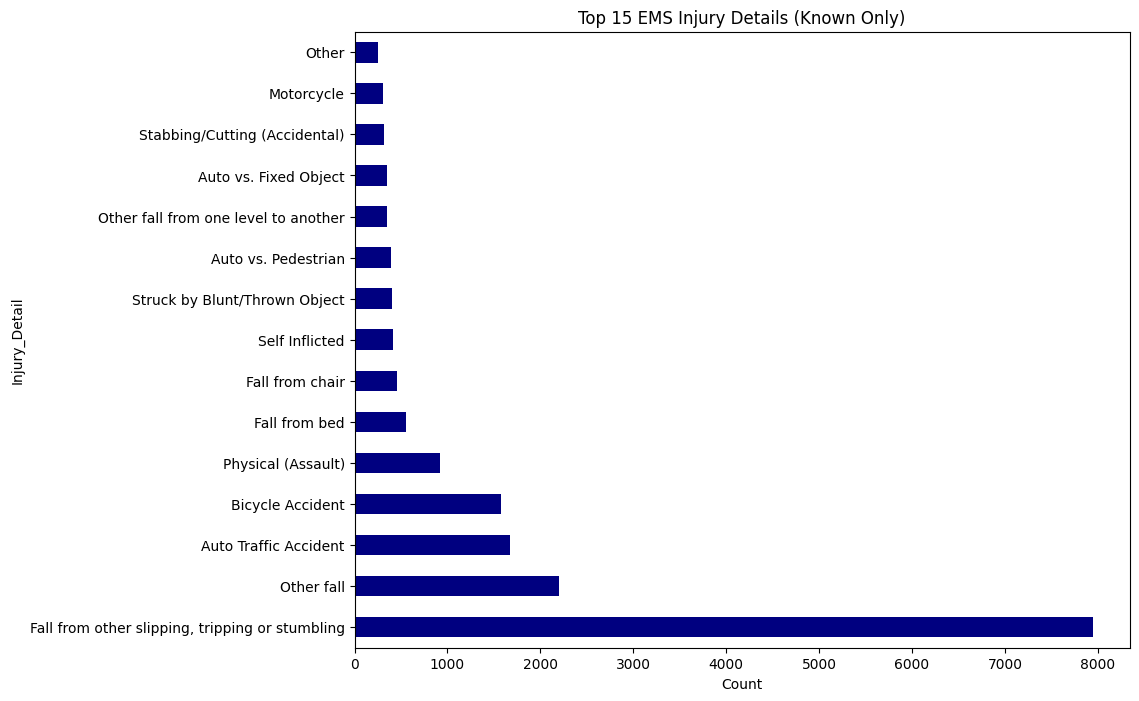

In [20]:
# Filter out unknown / NaN values
df_filtered = df[df['Injury_Detail'].notna() & (df['Injury_Detail'].str.strip().str.lower() != 'unknown')]

# Plot top 15
df_filtered['Injury_Detail'].value_counts().head(15).plot(kind='barh', figsize=(10,8), color='navy')
plt.title("Top 15 EMS Injury Details (Known Only)")
plt.xlabel("Count")
plt.show()


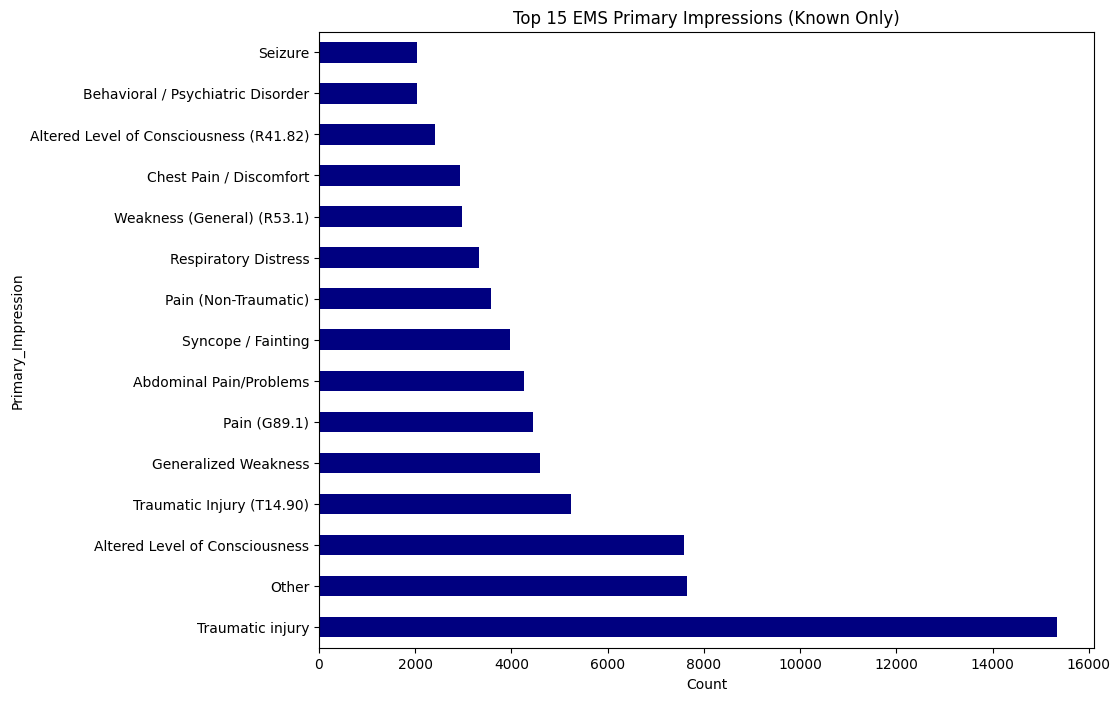

In [21]:
# Filter out unknown / NaN values
df_filtered = df[df['Primary_Impression'].notna() & (df['Primary_Impression'].str.strip().str.lower() != 'unknown')]

# Plot top 15
df_filtered['Primary_Impression'].value_counts().head(15).plot(kind='barh', figsize=(10,8), color='navy')
plt.title("Top 15 EMS Primary Impressions (Known Only)")
plt.xlabel("Count")
plt.show()


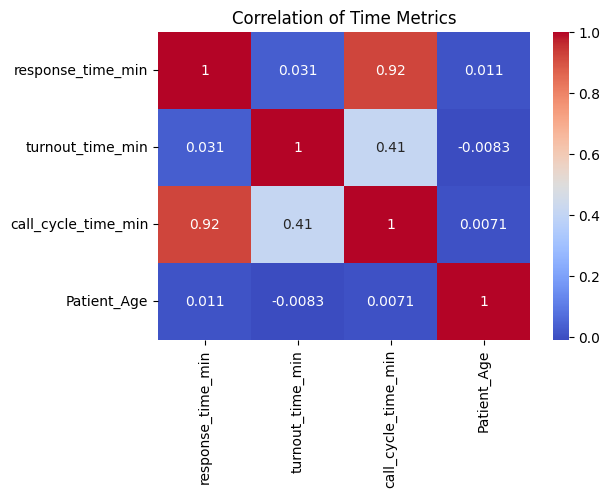

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Time Metrics")
plt.show()
